# IMPORT DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_bfeature = pd.read_excel('03_train_bfeature.xlsx',index_col=0)
test_bfeature = pd.read_excel('03_test_bfeature.xlsx', index_col=0)

In [3]:
train_bfeature.head()

,ER,PR,HER,B,M,A1,A2,A3,B1,C1,...,J5,J6,BI-RADS 1,BI-RADS 2,BI-RADS 3,BI-RADS 4A,BI-RADS 4B,BI-RADS 4C,BI-RADS 5,BI-RADS 6
ID,,,,,,,,,,,,,,,,,,,,,
4664727,NaN,NaN,NaN,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4670551,NaN,NaN,NaN,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4603364,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4621837,NaN,NaN,NaN,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4633063,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [4]:
idqfeature = pd.read_excel('02_1_idqfeature.xlsx',index_col=0)
idqfeature

,index,form_factor,aspect_ratio,ls,nrv,mcr,sENS,oDWR,mMU,mMA,...,bLB10px,bLB25,bLB50,bLB100,bNRG,eEPi,eEPc,eACOR,PS_D,MSD
ID,,,,,,,,,,,,,,,,,,,,,
4562943,1.2.250.1.204.5.8373722513.2016053115163325608...,497.025797,0.581132,1.860344,0.096305,0.064734,0.590177,0.581132,2,3,...,9.795559,9.795559,23.646677,26.938404,0.109787,47.625337,1.014554,0.947057,19.387894,14.0
4562999,1.2.250.1.204.5.8373722513.2016060107595026328...,242.313876,0.666667,1.517867,0.039375,0.013549,0.596358,0.666667,2,3,...,18.684254,10.146382,17.132882,23.871890,0.258396,64.373990,0.690866,0.935852,-29.721626,0.0
4565672,1.2.250.1.204.5.8373722513.2016060209322174456...,300.433080,0.936364,1.233815,0.046821,0.025930,0.695861,0.936364,3,4,...,5.765344,1.483820,8.764525,20.124303,0.084994,43.116069,0.952907,0.929989,-16.328746,0.0
4531808,1.2.250.1.204.5.8373722513.2016060209580040258...,425.162363,0.495455,2.017019,0.023838,0.044264,0.520135,0.495455,2,2,...,13.033275,11.725476,24.723422,28.723623,0.185205,71.386500,0.755324,0.944373,15.554613,6.0
4567784,1.2.250.1.204.5.8373722513.2016060508231863455...,646.455872,0.626298,1.616658,0.035126,0.095081,0.573398,0.626298,2,5,...,18.420933,22.512328,31.865971,37.453170,0.353745,30.343887,1.182384,0.954958,22.910358,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711008,4711008_2.jpg,624.741566,0.761134,1.359124,0.025808,0.169937,0.709371,0.761134,3,4,...,7.131586,9.291111,23.839130,41.103756,-0.039822,96.566369,0.705704,0.940967,39.508615,61.0
4711097,4711097_1.jpg,418.425106,0.588983,1.638028,0.076577,0.084227,1.087922,0.588983,3,6,...,4.143756,4.057201,5.783710,13.275889,0.046927,138.123462,0.512255,0.932226,9.846926,53.0
4711097,4711097_2.jpg,393.750844,0.268222,3.839416,0.083539,0.093051,0.493500,0.268222,2,2,...,3.184580,1.930225,8.438553,14.090415,0.129054,145.066495,0.497018,0.938062,-2.714540,30.0


In [5]:
idqfeature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3715 entries, 4562943 to 4711251
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         3715 non-null   object 
 1   form_factor   3715 non-null   float64
 2   aspect_ratio  3715 non-null   float64
 3   ls            3715 non-null   float64
 4   nrv           3715 non-null   float64
 5   mcr           3715 non-null   float64
 6   sENS          3715 non-null   float64
 7   oDWR          3715 non-null   float64
 8   mMU           3715 non-null   int64  
 9   mMA           3715 non-null   int64  
 10  mMUA          3715 non-null   int64  
 11  bLB10px       3715 non-null   float64
 12  bLB25         3715 non-null   float64
 13  bLB50         3715 non-null   float64
 14  bLB100        3715 non-null   float64
 15  bNRG          3715 non-null   float64
 16  eEPi          3715 non-null   float64
 17  eEPc          3715 non-null   float64
 18  eACOR         3715 non-n

# Data set division

In [6]:
train_bqfeature = pd.merge(idqfeature,train_bfeature,left_on=idqfeature.index,right_on=train_bfeature.index,how='inner')
train_bqfeature.set_index('key_0',inplace=True)
train_bqfeature.head()

,index,form_factor,aspect_ratio,ls,nrv,mcr,sENS,oDWR,mMU,mMA,...,J5,J6,BI-RADS 1,BI-RADS 2,BI-RADS 3,BI-RADS 4A,BI-RADS 4B,BI-RADS 4C,BI-RADS 5,BI-RADS 6
key_0,,,,,,,,,,,,,,,,,,,,,
4562943,1.2.250.1.204.5.8373722513.2016053115163325608...,497.025797,0.581132,1.860344,0.096305,0.064734,0.590177,0.581132,2,3,...,0,0,0,0,0,0,1,0,0,0
4562999,1.2.250.1.204.5.8373722513.2016060107595026328...,242.313876,0.666667,1.517867,0.039375,0.013549,0.596358,0.666667,2,3,...,0,0,0,0,1,0,0,0,0,0
4567784,1.2.250.1.204.5.8373722513.2016060508231863455...,646.455872,0.626298,1.616658,0.035126,0.095081,0.573398,0.626298,2,5,...,0,0,0,0,0,1,0,0,0,0
4562435,1.2.250.1.204.5.8373722513.2016060514055665388...,560.692873,0.683128,1.640397,0.019188,0.067247,0.510398,0.683128,2,3,...,0,0,0,0,0,0,1,0,0,0
4570773,1.2.250.1.204.5.8373722513.2016060516361290058...,465.628934,0.765714,1.305461,0.015577,0.045642,0.586069,0.765714,2,3,...,0,0,0,0,0,0,1,0,0,0


In [7]:
train_bqfeature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2980 entries, 4562943 to 4711251
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         2980 non-null   object 
 1   form_factor   2980 non-null   float64
 2   aspect_ratio  2980 non-null   float64
 3   ls            2980 non-null   float64
 4   nrv           2980 non-null   float64
 5   mcr           2980 non-null   float64
 6   sENS          2980 non-null   float64
 7   oDWR          2980 non-null   float64
 8   mMU           2980 non-null   int64  
 9   mMA           2980 non-null   int64  
 10  mMUA          2980 non-null   int64  
 11  bLB10px       2980 non-null   float64
 12  bLB25         2980 non-null   float64
 13  bLB50         2980 non-null   float64
 14  bLB100        2980 non-null   float64
 15  bNRG          2980 non-null   float64
 16  eEPi          2980 non-null   float64
 17  eEPc          2980 non-null   float64
 18  eACOR         2980 non-n

In [8]:
train_qfeature_ =train_bqfeature.iloc[:,1:21]

In [9]:
train_qfeature_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2980 entries, 4562943 to 4711251
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   form_factor   2980 non-null   float64
 1   aspect_ratio  2980 non-null   float64
 2   ls            2980 non-null   float64
 3   nrv           2980 non-null   float64
 4   mcr           2980 non-null   float64
 5   sENS          2980 non-null   float64
 6   oDWR          2980 non-null   float64
 7   mMU           2980 non-null   int64  
 8   mMA           2980 non-null   int64  
 9   mMUA          2980 non-null   int64  
 10  bLB10px       2980 non-null   float64
 11  bLB25         2980 non-null   float64
 12  bLB50         2980 non-null   float64
 13  bLB100        2980 non-null   float64
 14  bNRG          2980 non-null   float64
 15  eEPi          2980 non-null   float64
 16  eEPc          2980 non-null   float64
 17  eACOR         2980 non-null   float64
 18  PS_D          2980 non-n

In [10]:
train_target =train_bqfeature.B
train_target

key_0
4562943    1
4562999    1
4567784    0
4562435    0
4570773    1
          ..
4711008    0
4711097    1
4711097    1
4711132    0
4711251    1
Name: B, Length: 2980, dtype: int64

In [11]:
train_target.value_counts()

B
1    2217
0     763
Name: count, dtype: int64

In [12]:
test_bqfeature = pd.merge(idqfeature,test_bfeature,left_on=idqfeature.index,right_on=test_bfeature.index,how='inner')
test_bqfeature.set_index('key_0',inplace=True)
test_bqfeature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 4565672 to 4667864
Data columns (total 68 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         724 non-null    object 
 1   form_factor   724 non-null    float64
 2   aspect_ratio  724 non-null    float64
 3   ls            724 non-null    float64
 4   nrv           724 non-null    float64
 5   mcr           724 non-null    float64
 6   sENS          724 non-null    float64
 7   oDWR          724 non-null    float64
 8   mMU           724 non-null    int64  
 9   mMA           724 non-null    int64  
 10  mMUA          724 non-null    int64  
 11  bLB10px       724 non-null    float64
 12  bLB25         724 non-null    float64
 13  bLB50         724 non-null    float64
 14  bLB100        724 non-null    float64
 15  bNRG          724 non-null    float64
 16  eEPi          724 non-null    float64
 17  eEPc          724 non-null    float64
 18  eACOR         724 non-nul

In [13]:
test_qfeature_ =test_bqfeature.iloc[:,1:21]

In [14]:
test_qfeature_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 4565672 to 4667864
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   form_factor   724 non-null    float64
 1   aspect_ratio  724 non-null    float64
 2   ls            724 non-null    float64
 3   nrv           724 non-null    float64
 4   mcr           724 non-null    float64
 5   sENS          724 non-null    float64
 6   oDWR          724 non-null    float64
 7   mMU           724 non-null    int64  
 8   mMA           724 non-null    int64  
 9   mMUA          724 non-null    int64  
 10  bLB10px       724 non-null    float64
 11  bLB25         724 non-null    float64
 12  bLB50         724 non-null    float64
 13  bLB100        724 non-null    float64
 14  bNRG          724 non-null    float64
 15  eEPi          724 non-null    float64
 16  eEPc          724 non-null    float64
 17  eACOR         724 non-null    float64
 18  PS_D          724 non-nul

In [15]:
test_target =test_bqfeature.B
test_target

key_0
4565672    1
4531808    1
4567257    1
4574285    1
4562524    1
          ..
4608196    1
4609469    1
4612723    1
4714387    1
4667864    1
Name: B, Length: 724, dtype: int64

In [16]:
test_target.value_counts()

B
1    546
0    178
Name: count, dtype: int64

# Train the model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import accuracy_score

In [18]:
sstransfer = StandardScaler()

In [19]:
train_qfeature_s = sstransfer.fit_transform(train_qfeature_)
test_qfeature_s = sstransfer.transform(test_qfeature_)

# LASSO

In [20]:
param_grid={'C': np.logspace(-3,3,1000)}

In [21]:
log_l1 = LogisticRegression(solver='liblinear',random_state=99,penalty='l1',C=0.21395888713434216)

In [22]:
log_l1.fit(train_qfeature_s, train_target)

LogisticRegression(C=0.21395888713434216, penalty='l1', random_state=99,
                   solver='liblinear')

In [23]:
lasso_qfeature = log_l1.coef_!=0
lasso_qfeature = lasso_qfeature.reshape(lasso_qfeature.shape[1])

In [24]:
lasso_qfeature

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True])

In [25]:
col = list(train_qfeature_.columns[lasso_qfeature])

In [26]:
col.append('index')

In [27]:
col

['form_factor',
 'aspect_ratio',
 'ls',
 'nrv',
 'sENS',
 'oDWR',
 'mMU',
 'mMUA',
 'bLB10px',
 'bLB25',
 'bNRG',
 'eEPi',
 'eEPc',
 'eACOR',
 'MSD',
 'index']

In [28]:
idqfeature[col]

,form_factor,aspect_ratio,ls,nrv,sENS,oDWR,mMU,mMUA,bLB10px,bLB25,bNRG,eEPi,eEPc,eACOR,MSD,index
ID,,,,,,,,,,,,,,,,
4562943,497.025797,0.581132,1.860344,0.096305,0.590177,0.581132,2,5,9.795559,9.795559,0.109787,47.625337,1.014554,0.947057,14.0,1.2.250.1.204.5.8373722513.2016053115163325608...
4562999,242.313876,0.666667,1.517867,0.039375,0.596358,0.666667,2,5,18.684254,10.146382,0.258396,64.373990,0.690866,0.935852,0.0,1.2.250.1.204.5.8373722513.2016060107595026328...
4565672,300.433080,0.936364,1.233815,0.046821,0.695861,0.936364,3,7,5.765344,1.483820,0.084994,43.116069,0.952907,0.929989,0.0,1.2.250.1.204.5.8373722513.2016060209322174456...
4531808,425.162363,0.495455,2.017019,0.023838,0.520135,0.495455,2,4,13.033275,11.725476,0.185205,71.386500,0.755324,0.944373,6.0,1.2.250.1.204.5.8373722513.2016060209580040258...
4567784,646.455872,0.626298,1.616658,0.035126,0.573398,0.626298,2,7,18.420933,22.512328,0.353745,30.343887,1.182384,0.954958,27.0,1.2.250.1.204.5.8373722513.2016060508231863455...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4711008,624.741566,0.761134,1.359124,0.025808,0.709371,0.761134,3,7,7.131586,9.291111,-0.039822,96.566369,0.705704,0.940967,61.0,4711008_2.jpg
4711097,418.425106,0.588983,1.638028,0.076577,1.087922,0.588983,3,9,4.143756,4.057201,0.046927,138.123462,0.512255,0.932226,53.0,4711097_1.jpg
4711097,393.750844,0.268222,3.839416,0.083539,0.493500,0.268222,2,4,3.184580,1.930225,0.129054,145.066495,0.497018,0.938062,30.0,4711097_2.jpg


In [29]:
idqfeature[col].to_excel('05_lasso_idqfeature.xlsx')

In [30]:
train_qfeature__ = train_qfeature_.columns[lasso_qfeature]
train_qfeature__ = train_qfeature_[train_qfeature__]

In [31]:
test_qfeature__ = test_qfeature_.columns[lasso_qfeature]
test_qfeature__ = test_qfeature_[test_qfeature__]

In [32]:
train_qfeature__s = sstransfer.fit_transform(train_qfeature__)
test_qfeature__s = sstransfer.transform(test_qfeature__)

# RF

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc_clf = RandomForestClassifier(n_estimators=500,random_state=99,min_samples_split=16,min_samples_leaf=7)

In [35]:
rfc_clf.fit(train_qfeature__s,train_target)

RandomForestClassifier(min_samples_leaf=7, min_samples_split=16,
                       n_estimators=500, random_state=99)

In [36]:
rfc_clf.score(train_qfeature__s,train_target)

0.8848993288590604

In [37]:
rfc_clf.score(test_qfeature__s,test_target)

0.7941988950276243

D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


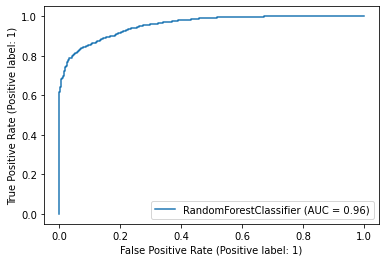

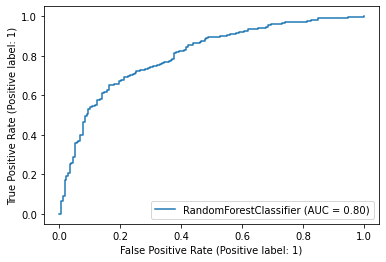

In [38]:
plot_roc_curve(rfc_clf, train_qfeature__s, train_target)
plot_roc_curve(rfc_clf, test_qfeature__s, test_target)

D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


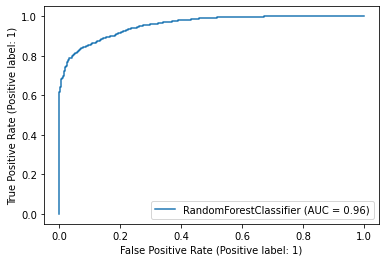

In [39]:
plot_roc_curve(rfc_clf, train_qfeature__s, train_target)
plt.savefig('05_q_rfc_train_auc.jpg')

D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


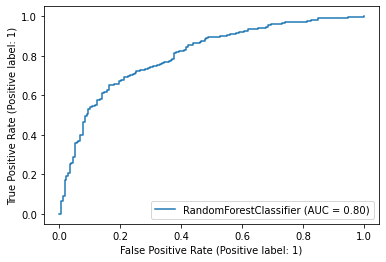

In [40]:
plot_roc_curve(rfc_clf, test_qfeature__s, test_target)
plt.savefig('05_q_rfc_test_auc.jpg')

D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


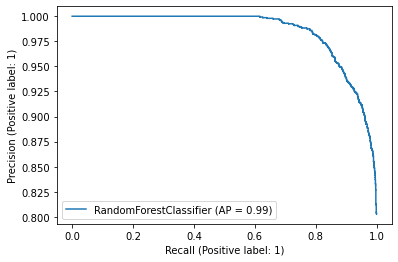

In [41]:
plot_precision_recall_curve(rfc_clf, train_qfeature__s, train_target)
plt.savefig('05_q_rfc_train_pr.jpg')

D:\Users\lihaiyang\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


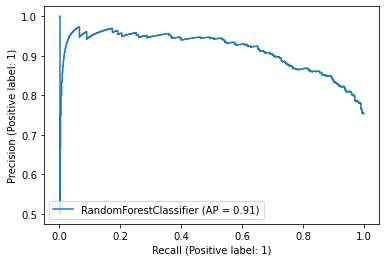

In [42]:
plot_precision_recall_curve(rfc_clf, test_qfeature__s, test_target)
plt.savefig('05_q_rfc_test_pr.jpg')

# Basic Statistics

## BI-RADS 1

In [38]:
train_bqfeature['BI-RADS 1'].value_counts()

BI-RADS 1
0    2979
1       1
Name: count, dtype: int64

In [39]:
train_target[train_bqfeature['BI-RADS 1']==1].value_counts()

B
1    1
Name: count, dtype: int64

In [40]:
test_bqfeature['BI-RADS 1'].value_counts()

BI-RADS 1
0    724
Name: count, dtype: int64

In [41]:
test_target[test_bqfeature['BI-RADS 1']==1].value_counts()

Series([], Name: count, dtype: int64)

## BI-RADS 6

In [42]:
train_bqfeature['BI-RADS 6'].value_counts()

BI-RADS 6
0    2980
Name: count, dtype: int64

In [43]:
train_target[train_bqfeature['BI-RADS 6']==1].value_counts()

Series([], Name: count, dtype: int64)

In [44]:
test_bqfeature['BI-RADS 6'].value_counts()

BI-RADS 6
0    724
Name: count, dtype: int64

In [45]:
test_target[test_bqfeature['BI-RADS 6']==1].value_counts()

Series([], Name: count, dtype: int64)

## Loop

In [46]:
bi_rads = ['BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4A', 'BI-RADS 4B', 'BI-RADS 4C' ,'BI-RADS 5']

In [47]:
bi_counts = pd.DataFrame()
bi_B_counts = pd.DataFrame()

for bi in bi_rads:
    bi_counts_ = train_bqfeature[bi].value_counts()
    bi_B_counts_ = train_target[train_bqfeature[bi]==1].value_counts()
    bi_counts = pd.concat((bi_counts,bi_counts_), axis=1)
    bi_B_counts = pd.concat((bi_B_counts,bi_B_counts_), axis=1)

In [48]:
bi_counts

,count,count,count,count,count,count
0,2906,2151,2003,2454,2600,2787
1,74,829,977,526,380,193


In [49]:
bi_B_counts

,count,count,count,count,count,count
1,72,804,826,335,156,23
0,2,25,151,191,224,170


In [50]:
bi_counts = pd.DataFrame()
bi_B_counts = pd.DataFrame()

for bi in bi_rads:
    bi_counts_ = test_bqfeature[bi].value_counts()
    bi_B_counts_ = test_target[test_bqfeature[bi]==1].value_counts()
    bi_counts = pd.concat((bi_counts,bi_counts_), axis=1)
    bi_B_counts = pd.concat((bi_B_counts,bi_B_counts_), axis=1)

In [51]:
bi_counts

,count,count,count,count,count,count
0,708,537,484,590,623,678
1,16,187,240,134,101,46


In [52]:
bi_B_counts

,count,count,count,count,count,count
1,16.0,179,205,95,45,6
0,NaN,8,35,39,56,40


# Calibration curve

In [58]:
bi_rads = ['BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4A', 'BI-RADS 4B', 'BI-RADS 4C' ,'BI-RADS 5']

In [59]:
score = pd.DataFrame()
re = pd.DataFrame()
for bi in bi_rads:
 
    train_bi_total = train_bqfeature[bi].sum()
    train_true_sum = train_target[train_bqfeature[bi]==1].sum()
    train_true_proba = train_true_sum / train_bi_total
   
    train_pre_sum = rfc_clf.predict(train_qfeature__s[train_bqfeature[bi]==1]).sum()
    train_pre_proba = train_pre_sum / train_bi_total
    
    train_sc = accuracy_score(train_target[train_bqfeature[bi]==1],rfc_clf.predict(train_qfeature__s[train_bqfeature[bi]==1]))
    
    
    test_bi_total = test_bqfeature[bi].sum()
    test_true_sum = test_target[test_bqfeature[bi]==1].sum()
    test_true_proba = test_true_sum / test_bi_total
       
    test_pre_sum = rfc_clf.predict(test_qfeature__s[test_bqfeature[bi]==1]).sum()
    test_pre_proba = test_pre_sum / test_bi_total
    
    test_sc = accuracy_score(test_target[test_bqfeature[bi]==1],rfc_clf.predict(test_qfeature__s[test_bqfeature[bi]==1]))
    
    score_ = pd.DataFrame((train_sc, test_sc))
    score = pd.concat((score, score_.T))
    
    re_ = pd.DataFrame((train_true_proba, train_pre_proba, test_true_proba, test_pre_proba))
    re = pd.concat((re, re_.T))

In [53]:
def proportion_ci(p, n, z=1.96):
    if n == 0:
        return np.nan, np.nan
    se = np.sqrt(p * (1 - p) / n)
    lower = max(0, p - z * se)
    upper = min(1, p + z * se)
    return round(lower, 3), round(upper, 3)


score = pd.DataFrame()
re = pd.DataFrame()
train_counts = []
test_counts = []

for bi in bi_rads:
    
    train_mask = train_bqfeature[bi] == 1
    test_mask  = test_bqfeature[bi] == 1

    
    train_bi_total = train_mask.sum()
    test_bi_total = test_mask.sum()
    train_counts.append(train_bi_total)
    test_counts.append(test_bi_total)

   
    train_y_true = train_target[train_mask]
    train_y_pred = rfc_clf.predict(train_qfeature__s[train_mask])
    train_sc = accuracy_score(train_y_true, train_y_pred)
    train_true_proba = train_y_true.sum() / train_bi_total
    train_pred_proba = train_y_pred.sum() / train_bi_total

    
    test_y_true = test_target[test_mask]
    test_y_pred = rfc_clf.predict(test_qfeature__s[test_mask])
    test_sc = accuracy_score(test_y_true, test_y_pred)
    test_true_proba = test_y_true.sum() / test_bi_total
    test_pred_proba = test_y_pred.sum() / test_bi_total

   
    score = pd.concat((score, pd.DataFrame([[train_sc, test_sc]])), ignore_index=True)

    
    re = pd.concat((re, pd.DataFrame([[train_true_proba, train_pred_proba, test_true_proba, test_pred_proba]])),
                   ignore_index=True)


score.columns = ['Train Accuracy', 'Test Accuracy']


train_ci = [proportion_ci(p, n) for p, n in zip(score['Train Accuracy'], train_counts)]
test_ci  = [proportion_ci(p, n) for p, n in zip(score['Test Accuracy'], test_counts)]


score['Train CI Lower'] = [ci[0] for ci in train_ci]
score['Train CI Upper'] = [ci[1] for ci in train_ci]
score['Test CI Lower']  = [ci[0] for ci in test_ci]
score['Test CI Upper']  = [ci[1] for ci in test_ci]
score['BI-RADS'] = bi_rads


score = score[['BI-RADS', 'Train Accuracy', 'Train CI Lower', 'Train CI Upper',
               'Test Accuracy', 'Test CI Lower', 'Test CI Upper']]

In [54]:
score

,BI-RADS,Train Accuracy,Train CI Lower,Train CI Upper,Test Accuracy,Test CI Lower,Test CI Upper
0,BI-RADS 2,1.000000,1.000,1.000,1.000000,1.000,1.000
1,BI-RADS 3,0.977081,0.967,0.987,0.946524,0.914,0.979
2,BI-RADS 4A,0.870010,0.849,0.891,0.795833,0.745,0.847
3,BI-RADS 4B,0.802281,0.768,0.836,0.723881,0.648,0.800
4,BI-RADS 4C,0.836842,0.800,0.874,0.623762,0.529,0.718
5,BI-RADS 5,0.839378,0.788,0.891,0.673913,0.538,0.809


In [61]:
re.index=['BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4A', 'BI-RADS 4B', 'BI-RADS 4C' ,'BI-RADS 5']

In [62]:
re.columns=['train_true_proba', 'train_pre_proba', 'test_true_proba', 'test_pre_proba']

In [63]:
re

,train_true_proba,train_pre_proba,test_true_proba,test_pre_proba
BI-RADS 2,0.972973,0.972973,1.000000,1.000000
BI-RADS 3,0.969843,0.992762,0.957219,0.967914
BI-RADS 4A,0.845445,0.936540,0.854167,0.925000
BI-RADS 4B,0.636882,0.781369,0.708955,0.820896
BI-RADS 4C,0.410526,0.494737,0.445545,0.544554
BI-RADS 5,0.119171,0.207254,0.130435,0.326087


In [64]:
re_ = 1-re
re_

,train_true_proba,train_pre_proba,test_true_proba,test_pre_proba
BI-RADS 2,0.027027,0.027027,0.000000,0.000000
BI-RADS 3,0.030157,0.007238,0.042781,0.032086
BI-RADS 4A,0.154555,0.063460,0.145833,0.075000
BI-RADS 4B,0.363118,0.218631,0.291045,0.179104
BI-RADS 4C,0.589474,0.505263,0.554455,0.455446
BI-RADS 5,0.880829,0.792746,0.869565,0.673913


In [65]:
train_proba = re_.iloc[:,:2].stack().reset_index()
train_proba.columns=['BI-RADS','DATA','PROBA']
train_proba

,BI-RADS,DATA,PROBA
0,BI-RADS 2,train_true_proba,0.027027
1,BI-RADS 2,train_pre_proba,0.027027
2,BI-RADS 3,train_true_proba,0.030157
3,BI-RADS 3,train_pre_proba,0.007238
4,BI-RADS 4A,train_true_proba,0.154555
5,BI-RADS 4A,train_pre_proba,0.063460
6,BI-RADS 4B,train_true_proba,0.363118
7,BI-RADS 4B,train_pre_proba,0.218631
8,BI-RADS 4C,train_true_proba,0.589474
9,BI-RADS 4C,train_pre_proba,0.505263


In [66]:
sns.set_theme(style="white", context='paper')

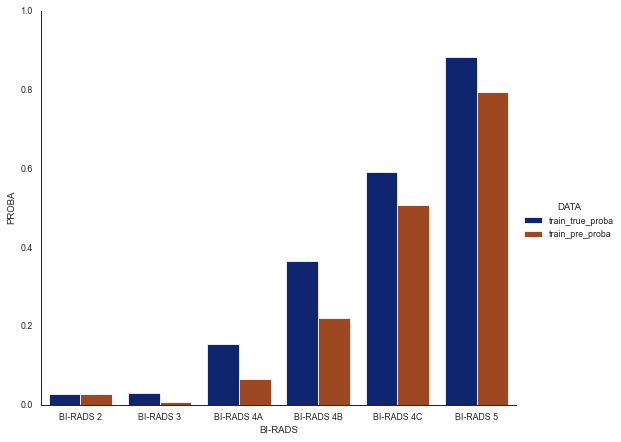

In [67]:
fig = sns.catplot(data=train_proba, kind="bar", x="BI-RADS", y="PROBA", hue="DATA",ci="sd", palette="dark", height=6, aspect=1.2)
fig.set(ylim=(0,1))
plt.savefig('05_q_train_cal.jpg')

In [68]:
test_proba = re_.iloc[:,2:].stack().reset_index()
test_proba.columns=['BI-RADS','DATA','PROBA']
test_proba

,BI-RADS,DATA,PROBA
0,BI-RADS 2,test_true_proba,0.000000
1,BI-RADS 2,test_pre_proba,0.000000
2,BI-RADS 3,test_true_proba,0.042781
3,BI-RADS 3,test_pre_proba,0.032086
4,BI-RADS 4A,test_true_proba,0.145833
5,BI-RADS 4A,test_pre_proba,0.075000
6,BI-RADS 4B,test_true_proba,0.291045
7,BI-RADS 4B,test_pre_proba,0.179104
8,BI-RADS 4C,test_true_proba,0.554455
9,BI-RADS 4C,test_pre_proba,0.455446


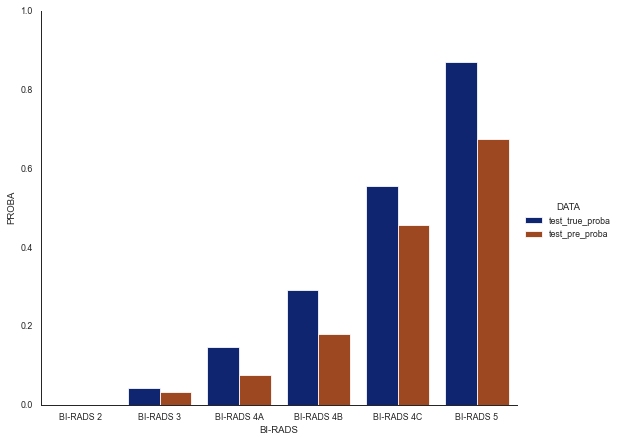

In [69]:
fig = sns.catplot(data=test_proba, kind="bar", x="BI-RADS", y="PROBA", hue="DATA",ci="sd", palette="dark", height=6, aspect=1.2)
fig.set(ylim=(0,1))
plt.savefig('05_q_test_cal.jpg')